<a href="https://colab.research.google.com/github/Parth11011/ASSIGEMENT/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


**as we see correlation is greater than 0.2 and is closely towards 1**

In [ ]:
df.corr() 

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


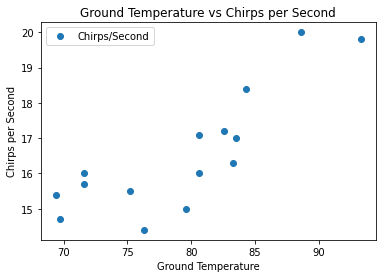

In [ ]:
df.plot(x='Ground Temperature',y='Chirps/Second', style="o")
plt.title('Ground Temperature vs Chirps per Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps per Second')
plt.show()
     

In [ ]:
import numpy as np
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


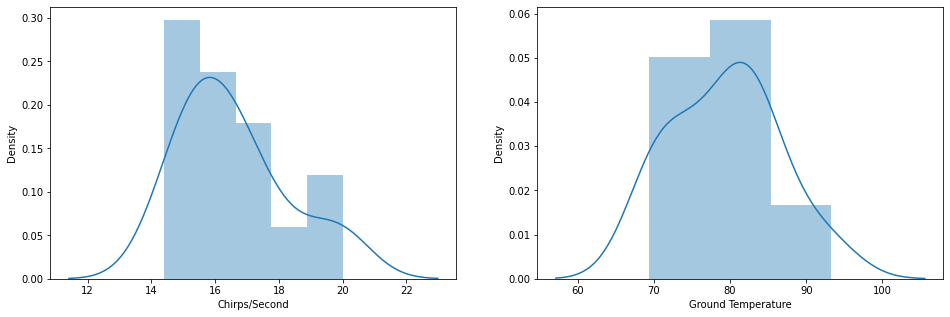

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["Chirps/Second"])
plt.subplot(1,2,2)
sns.distplot(df["Ground Temperature"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


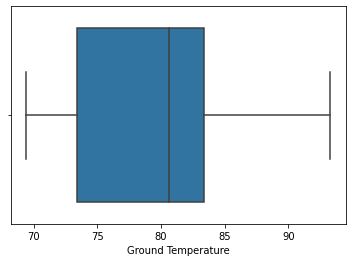

In [ ]:
sns.boxplot(df["Ground Temperature"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


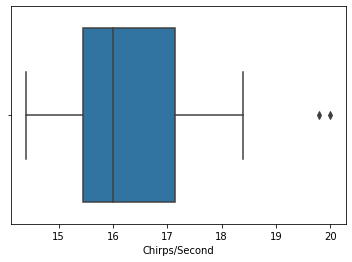

In [ ]:
sns.boxplot(df["Chirps/Second"])

In [ ]:
df["Chirps/Second"].skew()

0.9277571151070731

In [ ]:
# Checking out outliers
#25% is 15.450000 and 75% is 17.150
q1=df["Chirps/Second"].quantile(0.25)
q3=df["Chirps/Second"].quantile(0.75)
iqr =17.150-15.450
min=q1-iqr*1.5
max=q3+1.5*iqr
df[(df["Chirps/Second"])>max]

,Chirps/Second,Ground Temperature
0,20.0,88.6
2,19.8,93.3


In [ ]:
#Triming outliers
new_df=df[(df["Chirps/Second"])<max]

In [ ]:
new_df.shape,df.shape

((13, 2), (15, 2))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


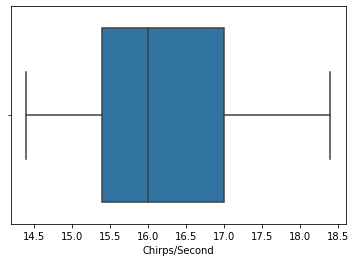

In [ ]:
sns.boxplot(new_df["Chirps/Second"])

In [ ]:
#capping
new_df_cap=df.copy()
new_df_cap["Chirps/Second"]=np.where(new_df_cap["Chirps/Second"]>max,max,np.where(
    new_df_cap["Chirps/Second"]<min,min,new_df_cap["Chirps/Second"]))
new_df_cap.shape

(15, 2)

In [ ]:
x=new_df_cap["Ground Temperature"]
y=new_df_cap['Chirps/Second']

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_te.shape

(3,)

In [ ]:
x_tr=np.array(x_tr).reshape(12,1)
y_tr=np.array(y_tr).reshape(12)
x_te=np.array(x_te).reshape(3,1)
y_te=np.array(y_te).reshape(3,1)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_tr,y_tr)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
x_te=np.array(x_te).reshape(3,1)
y_te=np.array(y_te).reshape(3,1)
y_pred=reg.predict(x_te)
r=r2_score(y_te,y_pred)
print("R2 square is: ",r*100)

R2 square is:  91.40258059014849


In [ ]:
print(reg.coef_)
m=reg.coef_

[0.19485916]


In [ ]:
print(reg.intercept_)
c=reg.intercept_

1.069421333319891


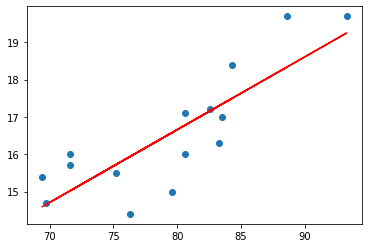

In [ ]:
plt.scatter(x,y)
plt.plot(x_tr,reg.predict(x_tr),color="red")


In [ ]:
#MY own gradient decent operator
class GDregressors:
  def __init__(self,learning_rate=0.05,epoches=100):
    self.coef=None
    self.intercept=None
    self.lr=learning_rate
    self.epoches=epoches
  def fit(self,x_tr,y_tr):
      self.intercept=90
      self.coef=np.ones(x_tr.shape[1]) #1d array of number of columns
      for i in range(self.epoches):
        #update all coeff and intercept i.e a single num
        y_hat= np.dot(x_tr,self.coef)+self.intercept #y_hat = b0+xib1+x2b2 
        der_inter=-2*np.mean(y_tr-y_hat)#
        self.intercept = self.intercept-self.lr*(der_inter)

        der_coef=-2*np.dot((y_tr-y_hat),x_tr)/(x_tr.shape[0])
        self.coef=self.coef-self.lr*(der_coef)
      return (self.intercept,der_coef)


In [ ]:
gdr=GDregressors()
c,m=gdr.fit(x_tr,y_tr)

In [ ]:

  c,m   

(3.7061528317871896e+278, array([-5.93999392e+281]))

Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
m=reg.coef_
c=reg.intercept_
q=float(input("enter the temp you want to predict: "))
def pri(q):
  yy=m*q+c
  return(yy)
s=pri(q)
print("crickets to be chirping at:",q ,"k temp is",s[0])

enter the temp you want to predict: 90
crickets to be chirping at: 90.0 k temp is 18.60674530896028


Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
m=reg.coef_
c=reg.intercept_
yy=float(input("enter the chirping you want to predict for: "))
def pri(yy):
  q=(yy-c)/m
  return(q)
s=pri(yy)
print("Predicted temp for chirping at :",yy,"per sec is",s[0])

enter the chirping you want to predict for: 20
Predicted temp for chirping at : 20.0 per sec is 97.15006020118847



Assignment6
Brain vs. Body Weight
In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks
Find the linear regression equation for this data for brain weight to body weight.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df1 = pd.read_fwf("/content/brain_body.txt")

In [ ]:
df1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


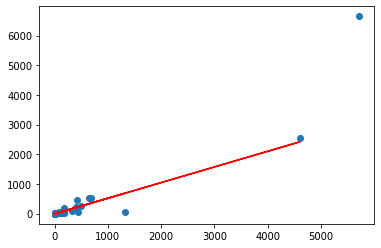

In [ ]:
plt.scatter(x,y)
plt.plot(x_tr,reg.predict(x_tr),color="red")


In [ ]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
#as we can see from data brain body is highly corelated
df1.corr() 

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
df1["Z_score"]=((df1["Body"]-df1["Body"].mean())/df1["Body"].std())

In [ ]:
new_df=df1[(df1["Z_score"]<3) & (df1["Z_score"]>-3)]

In [ ]:
new_df.shape

(60, 3)

In [ ]:
df1[df1["Z_score"]<-3]

,Brain,Body,Z_score


In [ ]:
df1["Body"].mean()

283.13419354838715

In [ ]:
x=df1["Body"]
y=df1['Brain']
df1.shape

(62, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_tr.shape
x_tr=np.array(x_tr).reshape(49,1)
y_tr=np.array(y_tr).reshape(49,1)
x_te=np.array(x_te).reshape(13,1)
y_te=np.array(y_te).reshape(13,1)

In [ ]:
import numpy as np
x_te.shape

(13, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_tr,y_tr)

LinearRegression()

In [ ]:
y_pred=reg.predict(x_te)

In [ ]:
m=reg.coef_
c=reg.intercept_

In [ ]:
print("reg.coef:",reg.coef_[0],"reg.intercept_:",reg.intercept_[0])

reg.coef: [0.52802248] reg.intercept_: -11.694494084218348


In [ ]:
r=r2_score(y_te,y_pred)
print("R2 square is: ",r*100)

R2 square is:  69.004838246223


Salary Discrimination
The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.
Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
Year. Number of years in current rank.
Degree. Highest degree. 1 for doctorate, 0 for master's.
YSdeg. Years since highest degree was earned.
Salary. Salary/year in dollars.
Tasks
Find the linear regression equation for this data using columns 1-5 to column 6.
Find the selection of columns with the best  R2  score.
Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [ ]:
y=df.iloc[:,5:6]
x=df.iloc[:,1:5]
y.head()

,Salary
0,36350
1,35350
2,28200
3,26775
4,33696


In [ ]:
x.head()

,Rank,Year,Degree,YSdeg
0,3,25,1,35
1,3,13,1,22
2,3,10,1,23
3,3,7,1,27
4,3,19,0,30


In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_tr,y_tr)

LinearRegression()

In [ ]:
m=reg.coef_
c=reg.intercept_

In [ ]:
m


array([[ 5467.39039358,   369.43203645, -1818.32639755,  -153.68145625]])

In [ ]:
y_pred=reg.predict(x_te)

In [ ]:
r=r2_score(y_te,y_pred)
print("R2 square is: ",r*100)

R2 square is:  69.004838246223
